In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import modules
from src.features import stat_tests as st
from src.features import calculate_chart_params as cp
from src.features import functions as fn
from src.features import plot_functions as pf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.stats import skewnorm
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [5]:
from statsmodels.graphics.gofplots import qqplot

#### skewnorm dist

In [6]:
skewnorm_series = pd.Series(fn.gen_rv(skewnorm, args=[-50, 20], size = 100))

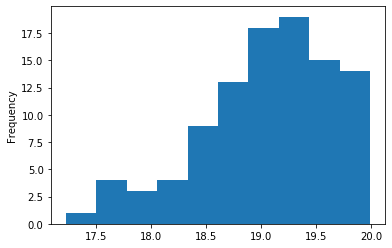

In [7]:
skewnorm_series.plot.hist()

#### Test for normality

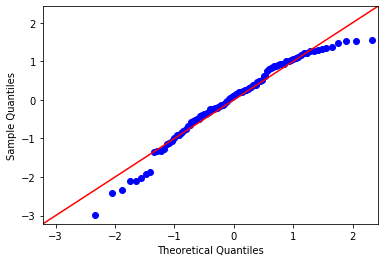

In [8]:
fig = qqplot(skewnorm_series, fit=True, line='45')
plt.show()

In [9]:
st.shapiro_wilks_(skewnorm_series)

Statistics=0.958, p=0.003
Sample does not look Gaussian (reject H0)


In [10]:
st.jarque_bera_(skewnorm_series)

Statistics=7.316, p=0.026, skew=-0.662, kurt=3.067
Sample does not look Gaussian (reject H0)


#### Individual control chart

In [11]:
in_control_mean = skewnorm_series.mean()

In [12]:
MR  = cp.calculate_MR(skewnorm_series)
in_control_sigma = cp.estimate_sigma_from_MR(MR)

In [13]:
in_control_mean, in_control_sigma

(19.051095719644533, 0.61855041002632)

In [14]:
x_ind_params = cp.x_ind_params(x = skewnorm_series, sigma = in_control_sigma, center=in_control_mean)

In [15]:
x_ind_params = x_ind_params.reset_index()

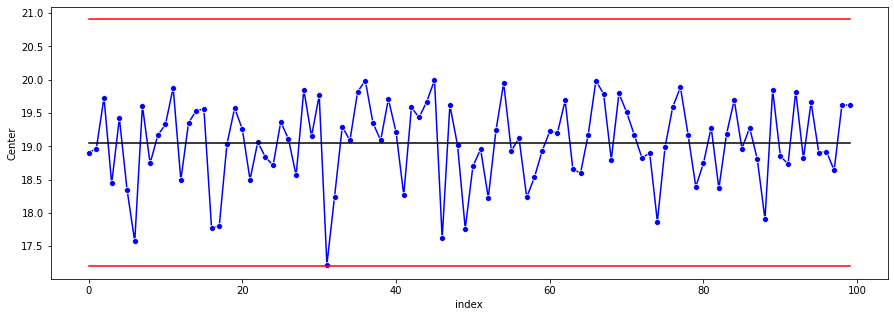

In [16]:
pf.plot_control_chart(
    data=x_ind_params,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

#### Transform gamma dist with boxcox

In [17]:
skewnorm_series_transformed = pd.Series(boxcox(skewnorm_series)[0])

In [18]:
lambda_bc = boxcox(skewnorm_series)[1]

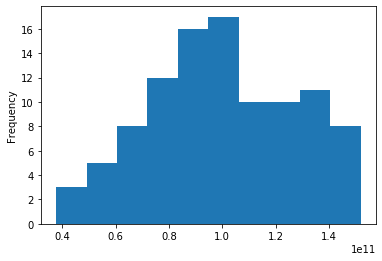

In [19]:
skewnorm_series_transformed.plot.hist()

#### Test for normality

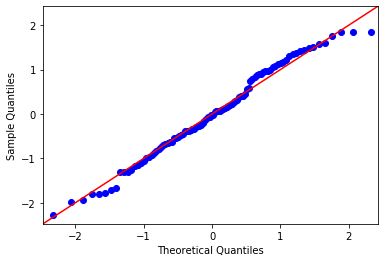

In [20]:
fig = qqplot(skewnorm_series_transformed, fit=True, line='45')
plt.show()

In [21]:
st.shapiro_wilks_(skewnorm_series_transformed)

Statistics=0.981, p=0.154
Sample looks Gaussian (fail to reject H0)


In [22]:
st.jarque_bera_(skewnorm_series_transformed)

Statistics=2.184, p=0.336, skew=-0.072, kurt=2.291
Sample looks Gaussian (fail to reject H0)


#### Individual control chart (transformed)

In [23]:
in_control_mean = skewnorm_series_transformed.mean()

In [24]:
MR  = cp.calculate_MR(skewnorm_series_transformed)
in_control_sigma = cp.estimate_sigma_from_MR(MR)

In [25]:
in_control_mean, in_control_sigma

(100498005763.74516, 28795116535.78252)

In [26]:
x_ind_params = cp.x_ind_params(x = skewnorm_series_transformed, sigma = in_control_sigma, center=in_control_mean)

In [27]:
x_ind_params = x_ind_params.reset_index()

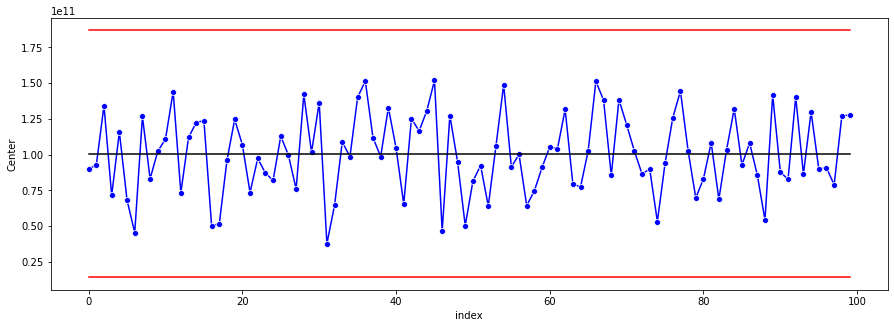

In [28]:
pf.plot_control_chart(
    data=x_ind_params,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

#### Back transform to original

In [29]:
x_ind_params2 = x_ind_params.copy()

In [30]:
x_ind_params2['obs'] = inv_boxcox(x_ind_params2['obs'], lambda_bc)
x_ind_params2['UCL'] = inv_boxcox(x_ind_params2['UCL'], lambda_bc)
x_ind_params2['Center'] = inv_boxcox(x_ind_params2['Center'], lambda_bc)
x_ind_params2['LCL'] = inv_boxcox(x_ind_params2['LCL'], lambda_bc)

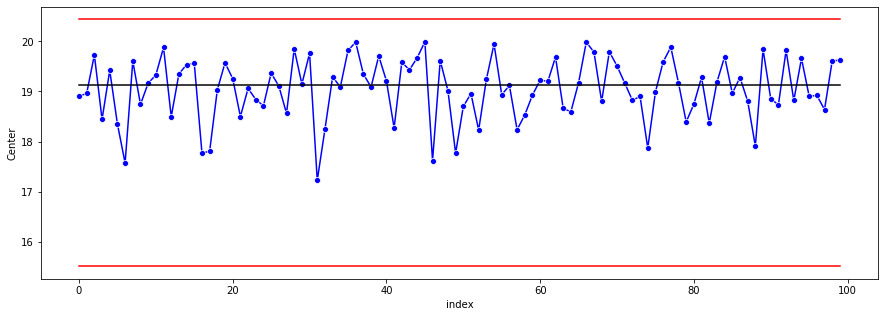

In [31]:
pf.plot_control_chart(
    data=x_ind_params2,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)